In [33]:
import pandas as pd
import seaborn as sns


In [34]:
data = pd.read_csv("indians diabetes.csv",header  = None)
data.head()


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
data = pd.read_csv("indians diabetes.csv",header  = None, names=["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age","label"])

In [36]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# or to reduce the length of code


In [37]:
colname = ["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age","label"]
data = pd.read_csv("indians diabetes.csv",header  = None, names= colname)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


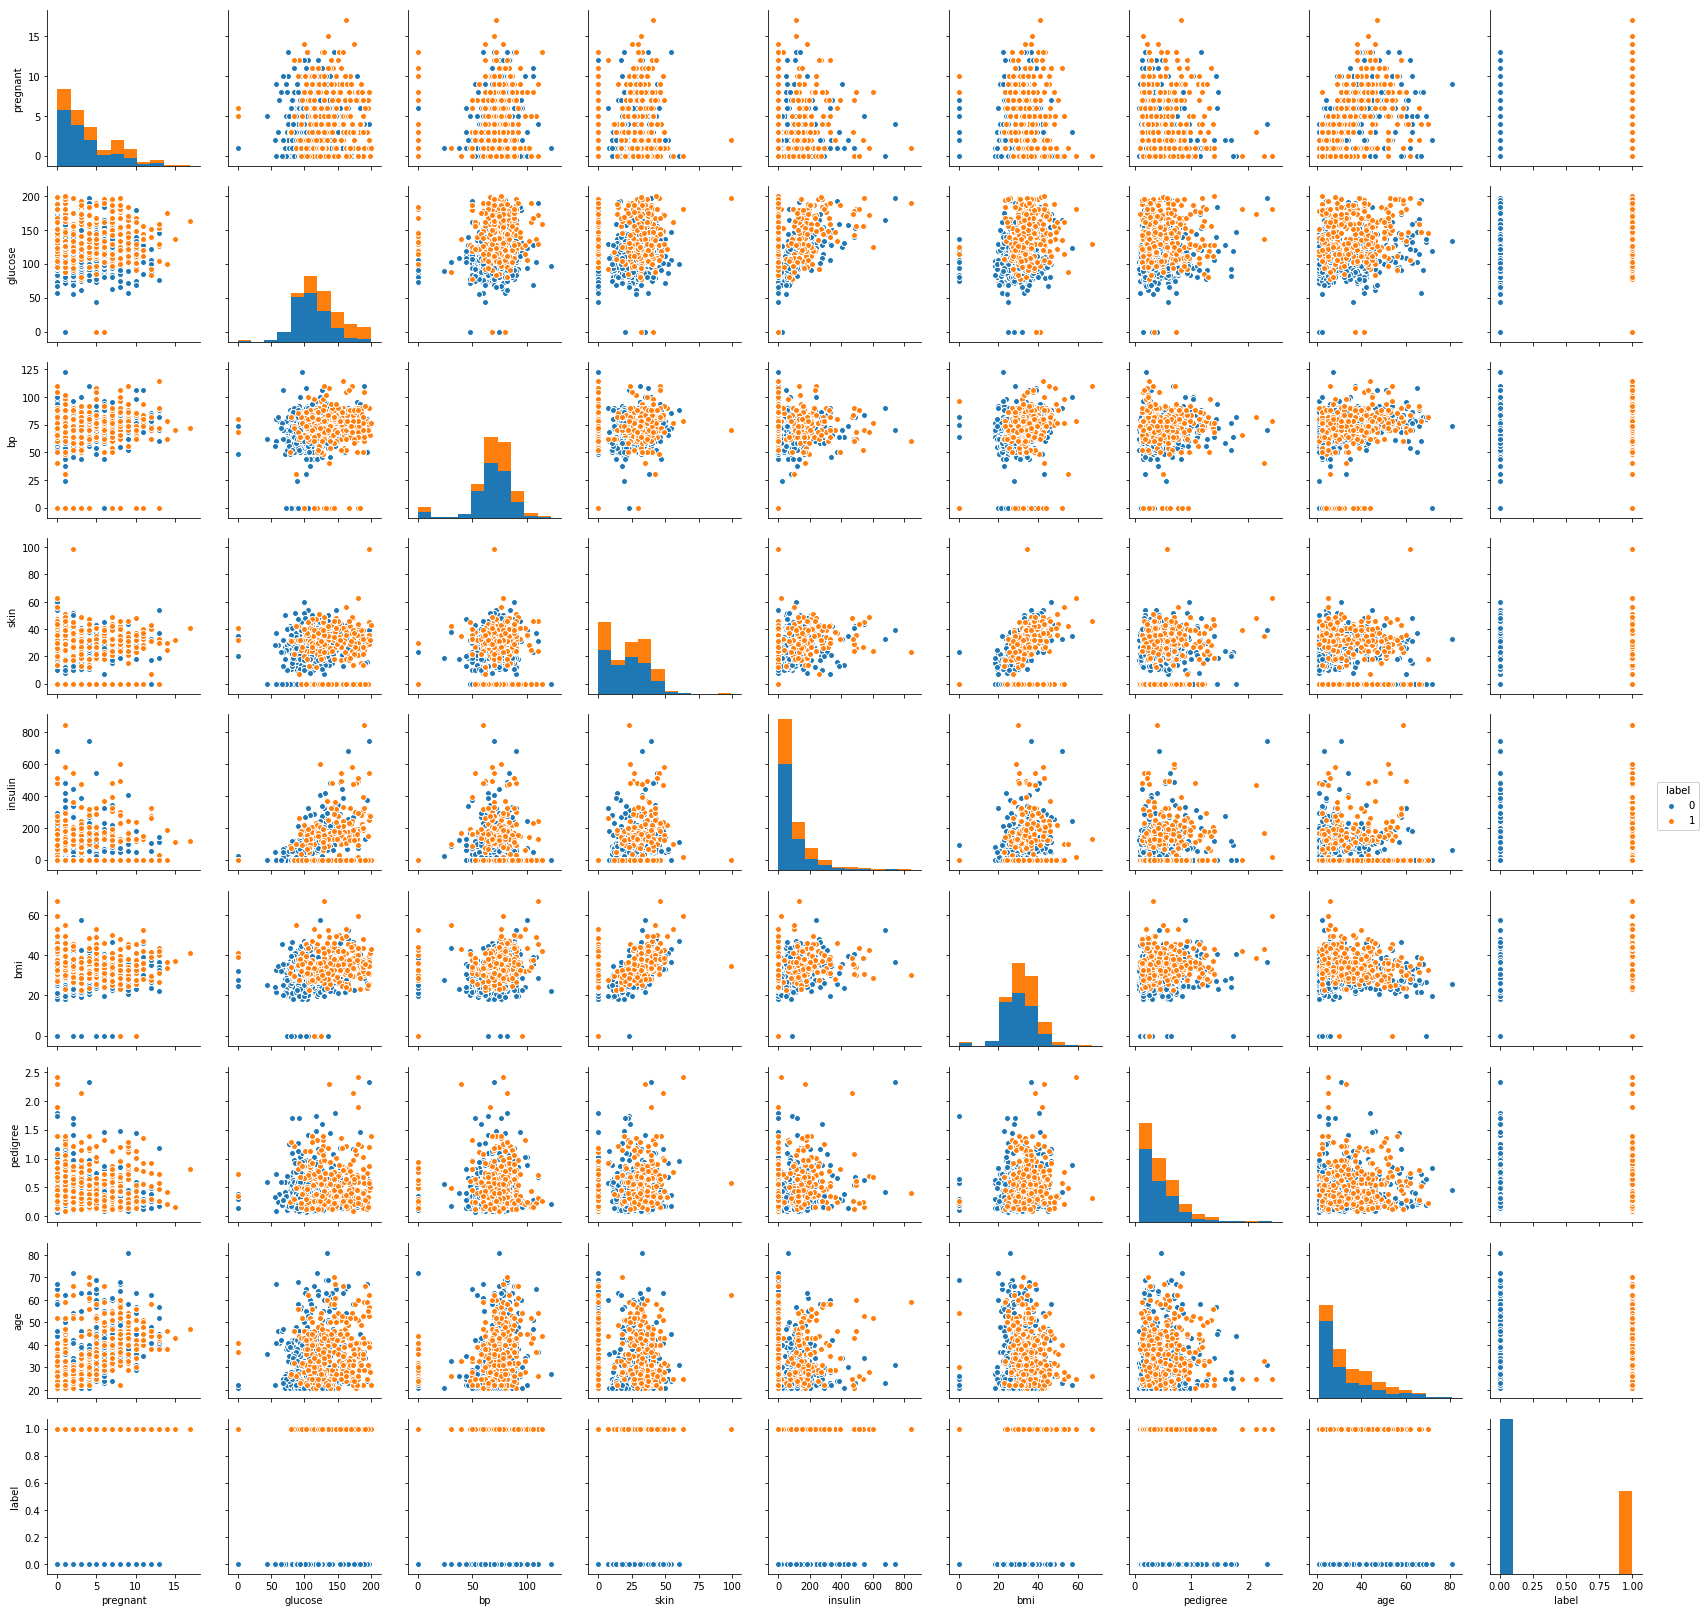

In [38]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data = data, hue = "label").add_legend()

In [39]:
# splitting the data

xvars = data[["pregnant","glucose","bp","skin","insulin","bmi","pedigree","age"]]
yvars = data["label"]

In [40]:
from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test = train_test_split(xvars,yvars, random_state = 1)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [42]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [43]:
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
ypred = logreg.predict(x_test)


In [46]:
from sklearn import metrics

print(metrics.accuracy_score(y_test,ypred))

0.78125


In [47]:
# confusion matrics
print(metrics.confusion_matrix(y_test,ypred))

[[110  13]
 [ 29  40]]


# ROC curve or AREA under the curve
